In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

#TEST SVM
from sklearn.svm import SVR

#TEST LSTM 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
df = pd.read_csv('.csv')
#print first 6 rows of data
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000
1,2017-03-06,49.582001,50.340000,49.501999,50.242001,50.242001,16777500
2,2017-03-07,50.383999,50.778000,49.664001,49.717999,49.717999,17297500
3,2017-03-08,49.400002,50.014000,49.063999,49.374001,49.374001,18626000
4,2017-03-09,49.526001,49.731998,48.599998,48.980000,48.980000,19396500
5,2017-03-10,49.242001,49.299999,48.599998,48.737999,48.737999,15331500


In [ ]:
df.shape
#(trading days in data set, ?)

(1259, 7)

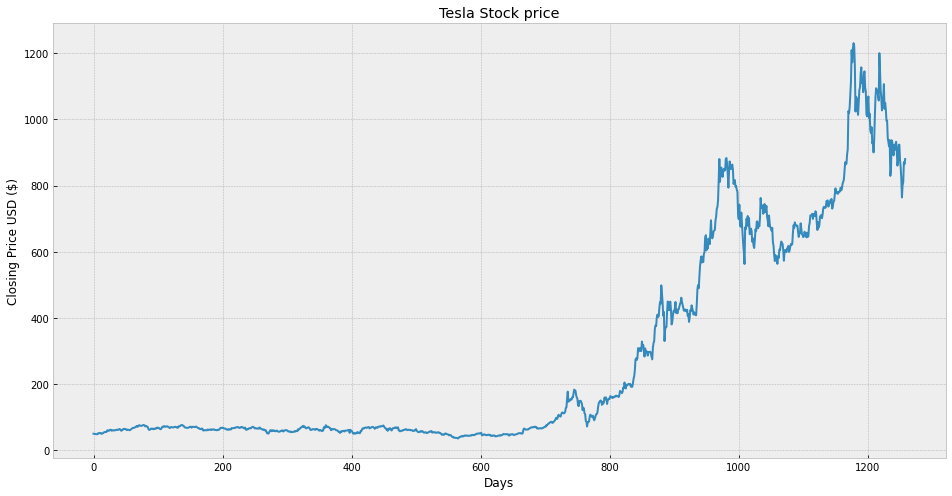

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Tesla Stock price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.head(4)

,Close
0,50.313999
1,50.242001
2,49.717999
3,49.374001


In [ ]:

future_days = 50
#Create aivariable to predict 'x' days out into the future
df[['Prediction']] = df[['Close']].shift(-future_days)
#Create a new column (target) shifted 'x' units/days up
df.head()

,Close,Prediction
0,50.313999,63.175999
1,50.242001,63.402000
2,49.717999,61.222000
3,49.374001,62.612000
4,48.980000,62.166000


In [ ]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 50.313999]
 [ 50.242001]
 [ 49.717999]
 ...
 [975.98999 ]
 [926.919983]
 [932.570007]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 63.175999  63.402     61.222    ... 870.429993 864.369995 879.890015]


In [ ]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr= LinearRegression().fit(x_train, y_train)

#TEST SVM
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

#TEST POLY
poly_svr = SVR(kernel='poly', C=1.0, degree=1)
poly_svr.fit(x_train, y_train)



SVR(degree=1, kernel='poly')

In [ ]:
#TEST CONFINDENCE SCORES FOR ALL 4 MODELS

linearRegression_confidenceScore = lr.score(x_test, y_test)
dt_confidenceScore = tree.score(x_test, y_test)
rbf_confidenceScore = svr_rbf.score(x_test, y_test)
poly_confidenceScore = poly_svr.score(x_test, y_test)
print("Linear Regression confidence: ", linearRegression_confidenceScore)
print("Decision Tree confidence: ", dt_confidenceScore)
print("Radial Basis function confidence: ", rbf_confidenceScore)
print("Polynomial confidence: ", poly_confidenceScore)

Linear Regression confidence:  0.8818839021686343
Decision Tree confidence:  0.8442205905182216
Radial Basis function confidence:  0.8544152954283332
Polynomial confidence:  0.8250939319761448


In [ ]:
#Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[ 785.48999 ],
       [ 791.940002],
       [ 805.719971],
       [ 811.080017],
       [ 818.320007],
       [ 843.030029],
       [ 870.109985],
       [ 864.27002 ],
       [ 865.799988],
       [ 894.      ],
       [ 909.679993],
       [1024.859985],
       [1018.429993],
       [1037.859985],
       [1077.040039],
       [1114.      ],
       [1208.589966],
       [1172.      ],
       [1213.859985],
       [1229.910034],
       [1222.089966],
       [1162.939941],
       [1023.5     ],
       [1067.949951],
       [1063.51001 ],
       [1033.420044],
       [1013.390015],
       [1054.72998 ],
       [1089.01001 ],
       [1096.380005],
       [1137.060059],
       [1156.869995],
       [1109.030029],
       [1116.      ],
       [1081.920044],
       [1136.98999 ],
       [1144.76001 ],
       [1095.      ],
       [1084.599976],
       [1014.969971],
       [1009.01001 ],
       [1051.75    ],
       [1068.959961],
       [1003.799988],
       [1017.030029],
       [ 9

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

#TEST SVM
svm_prediction = svr_rbf.predict(x_future)
print(svm_prediction)

#TEST POLY
poly_prediction = poly_svr.predict(x_future)
print(svm_prediction)

[ 899.940002  938.530029 1067.       1067.       1093.939941 1088.469971
  738.849976 1070.339966 1056.780029  683.799988 1149.589966  943.900024
 1064.699951 1026.959961 1058.119995 1064.400024 1106.219971 1031.560059
 1049.609985 1030.51001   995.650024  891.140015  943.900024  930.
  918.400024  937.409973  829.099976  846.349976  875.76001   931.25
  905.659973  891.140015  923.320007  907.340027  922.        932.
  905.659973  860.        875.76001   922.429993  829.099976  876.349976
  930.        821.530029  764.039978  800.77002   809.869995  800.77002
  864.369995  879.890015]
[ 837.00107209  843.62933943  857.79013768  863.29831625  870.73839378
  896.13131274  923.95966223  917.9583014   919.53055227  948.50991212
  964.62324425 1082.98640082 1076.37870675 1096.3456745  1136.60852558
 1174.58992821 1271.79402382 1234.19284154 1277.20968737 1293.70330253
 1285.66711572 1224.88239479 1081.58883068 1127.26721994 1122.70457479
 1091.78302935 1071.19944172 1113.68189605 1148.9093

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


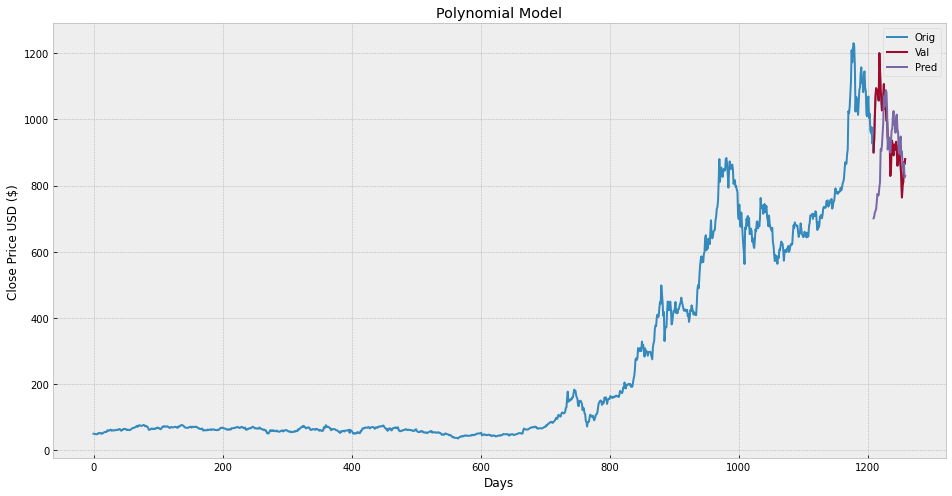

In [ ]:
predictions = poly_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Polynomial Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


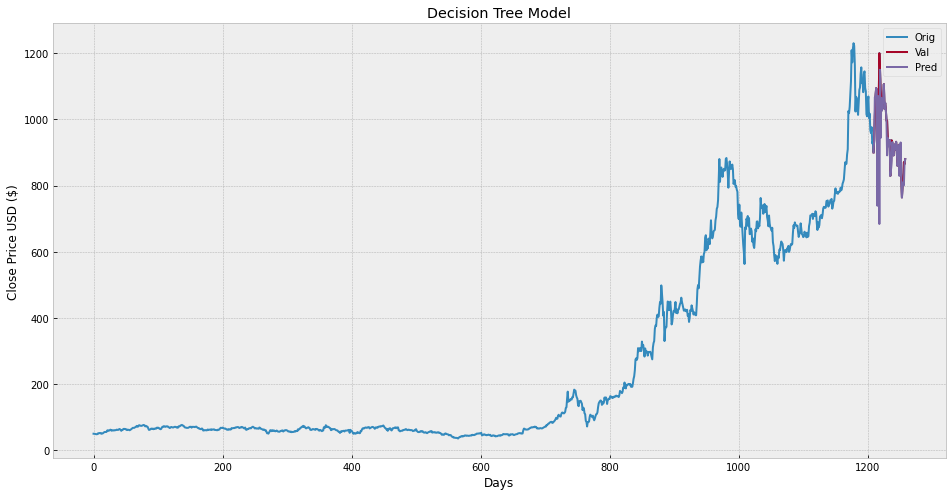

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


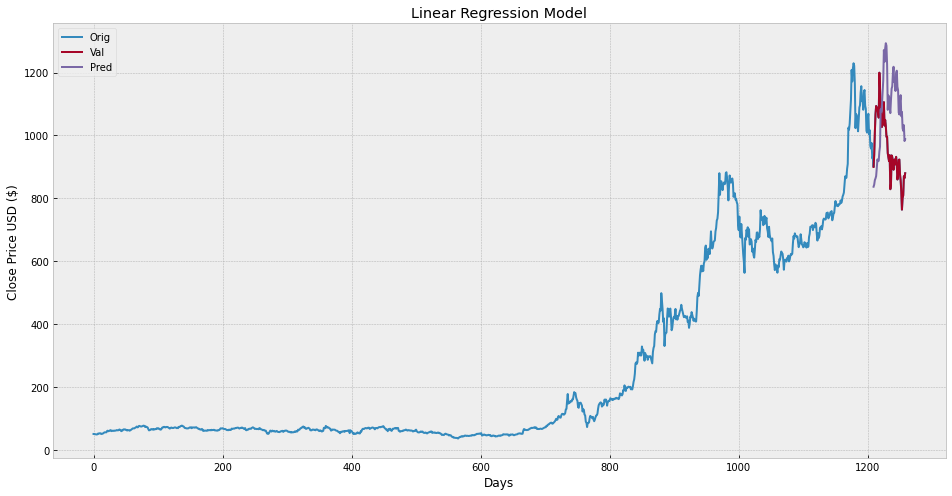

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


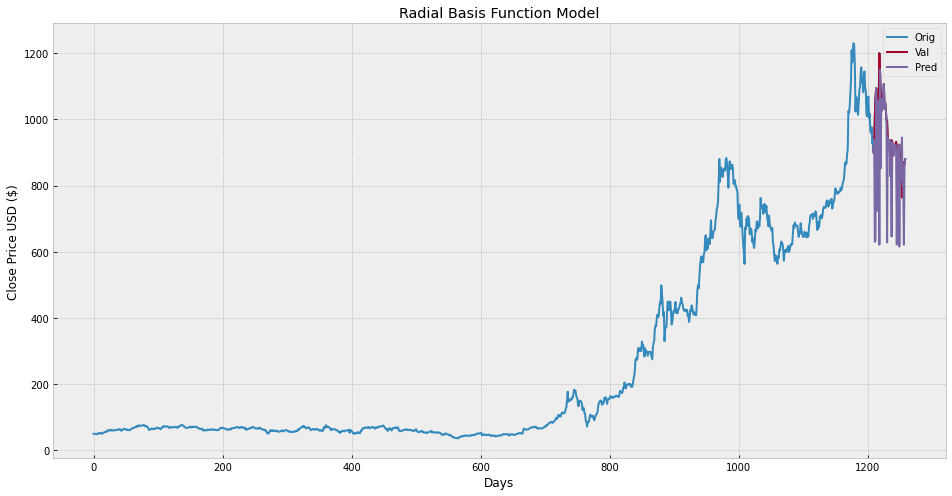

In [ ]:
predictions = svm_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Radial Basis Function Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()